<a href="https://colab.research.google.com/github/nicePaul521/ML/blob/master/pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pandas包含两种数据类型：series和dataframe,series是一种一维的数据结构，每一个元素都带有一个索引，与一维数组的含义相同，其中索引可以为数组或字符串

!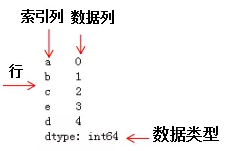[series结构名称](https://)

dataframe是一种二维数据结构，数据以表格形式存储，有对应的行和列

## 如何从列表数组字典创建series

In [1]:
import pandas as pd
import numpy as np

mylist = list('abcdefghijklmnopqrstuvwxyz')#列表
myarr = np.arange(26)#数组
mydict = dict(zip(mylist,myarr))#字典

#构建方法
ser1 = pd.Series(mylist)
ser2 = pd.Series(myarr)
ser3 = pd.Series(mydict)

print(ser3.head())

a    0
b    1
c    2
d    3
e    4
dtype: int64


## 如何使series的索引转化为dataframe的列

In [2]:
mylist = list('abcdefghijklmnopqrstuvwxyz')
myarr = np.arange(26)
mydict = dict(zip(mylist,myarr))
ser = pd.Series(mydict)

#series转换为dataframe
df = ser.to_frame()
df.reset_index(inplace=True)
print(df.head())

  index  0
0     a  0
1     b  1
2     c  2
3     d  3
4     e  4


## 如何结合多个series组成dataframe

In [3]:
#构建series1
ser1 = pd.Series(list('abcdefghijklmnopqrstuvwxyz'))
#构建series2
ser2 = pd.Series(np.arange(26))

#方法一，axis=1表示列拼接，0表示行拼接
df = pd.concat([ser1,ser2],axis=1)

#与方法1相比，方法2设置了列名
df = pd.DataFrame({'col1':ser1,'col2':ser2})
print(df.head())

  col1  col2
0    a     0
1    b     1
2    c     2
3    d     3
4    e     4


## 如何命名列索引的名称

In [4]:
ser1.name = 'alpha'
ser1.head()

0    a
1    b
2    c
3    d
4    e
Name: alpha, dtype: object

## 如何获得series对象A中不包含series对象B的元素

In [5]:
ser1 = pd.Series([1,2,3,4,5])
ser2 = pd.Series([4,5,6,7,8])

#返回ser1中不包含ser2的布尔型series
ser3 = ~ser1.isin(ser2)
#获取ser1不包含ser2的元素
ser1[ser3]

0    1
1    2
2    3
dtype: int64

## 如何让获得seriesA和seriesB不相同的项

In [7]:
ser1 = pd.Series([1,2,3,4,5])
ser2 = pd.Series([4,5,6,7,8])

#求ser1和ser2的并集
ser_u = pd.Series(np.union1d(ser1,ser2))
#求ser1和ser2的交集
ser_i = pd.Series(np.intersect1d(ser1,ser2))
#ser_i在ser_u的补集就是ser1和ser2不相同的项
ser_u[~ser_u.isin(ser_i)]

0    1
1    2
2    3
5    6
6    7
7    8
dtype: int64

## 如何获取数值series的四分位值

In [8]:
#设置随机数种子
state = np.random.RandomState(100)
#从均值为5标准差为25的正态分布随机抽取5个点构成series
ser = pd.Series(state.normal(10,5,25))
#求ser的4分位数
np.percentile(ser,q=[0,25,50,75,100])

array([ 1.25117263,  7.70986507, 10.92259345, 13.36360403, 18.0949083 ])

## 如何获得series中单一项的频率计数

In [0]:
#从0-7随机抽取30个列表值，组成series
ser = pd.Series(np.take(list('abcdefg'),np.radom.randint(8,size=30)))
#对该series进行计数
ser.value_counts()

## 如何保留series中前两个频次最多的项，其他项替换为‘other’

In [9]:
np.random.RandomState(100)
#从1-4中均匀采样12个点组成series
ser = pd.Series(np.random.randint(1,5,[12]))
#除前两行索引对应的值不变，后几行索引对应的值为other
ser[~ser.isin(ser.value_counts().index[:2])] = 'Other'
ser

0         1
1         1
2         1
3     Other
4         2
5         2
6         2
7         2
8     Other
9         1
10    Other
11        2
dtype: object